# REPLACE NP.INF VALUES WITH 0 IN HAS_SUPERSTRUCTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing and Examining Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train = pd.read_csv('train_values.csv')
train_dum = pd.get_dummies(train, drop_first=True)

test = pd.read_csv('test_values.csv')
test_dum = pd.get_dummies(test, drop_first=True)

train_labels = pd.read_csv('train_labels.csv')

full = pd.concat([train_dum,train_labels['damage_grade']],axis=1)

x = abs(full.corrwith(full['damage_grade']))

params = [x[x.values>0.0001].index[i] for i in range(len(x[x.values>0.0001]))]

x = train_dum[params[:-1]]
X = test_dum[params[:-1]]
y = train_labels['damage_grade']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## FEATURE ENGINEERING

In [3]:
data = pd.concat([x, X], axis=0, )

In [4]:
data.drop('building_id', axis=1, inplace=True)

In [5]:
data['families_per_floor'] = data['count_families'] / data['count_floors_pre_eq']
data['family_per_area'] = data['count_families'] / (data['area_percentage'] * data['count_floors_pre_eq'])

data['height_per_floor'] = data['height_percentage'] / data['count_floors_pre_eq']

data['has_superstructure'] = (data['has_superstructure_adobe_mud'] | data['has_superstructure_bamboo'] |
                              data['has_superstructure_cement_mortar_brick'] | data['has_superstructure_cement_mortar_stone'] |
                              data['has_superstructure_mud_mortar_brick'] | data['has_superstructure_mud_mortar_stone'] |
                              data['has_superstructure_other'] | data['has_superstructure_stone_flag'] |
                              data['has_superstructure_timber'])
data['has_cement'] = (data['has_superstructure_cement_mortar_brick'] | data['has_superstructure_cement_mortar_stone'])
data['has_mortar'] = (data['has_superstructure_mud_mortar_brick'] | data['has_superstructure_mud_mortar_stone'])



In [6]:
0 | 0

0

In [7]:
data.shape

(347469, 66)

In [8]:
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,families_per_floor,family_per_area,height_per_floor,has_superstructure,has_cement,has_mortar
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,1,0,0.500000,0.083333,2.5,1,0,1
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,1,0,0.500000,0.062500,3.5,1,0,1
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,1,0,0.500000,0.100000,2.5,1,0,1
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,1,0,0.500000,0.083333,2.5,1,0,1
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,1,0,0.333333,0.041667,3.0,1,0,0


In [9]:
data.corrwith(data['has_superstructure'])[:10]

geo_level_1_id                        -0.008654
geo_level_2_id                         0.043400
geo_level_3_id                         0.012503
count_floors_pre_eq                   -0.034625
age                                    0.038383
area_percentage                       -0.256478
height_percentage                     -0.134534
has_superstructure_adobe_mud           0.051396
has_superstructure_mud_mortar_stone    0.294342
has_superstructure_stone_flag          0.031026
dtype: float64

In [10]:
data['has_superstructure'].value_counts()

1    338318
0      9151
Name: has_superstructure, dtype: int64

In [11]:
data[data['has_superstructure'] == 1].describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,families_per_floor,family_per_area,height_per_floor,has_superstructure,has_cement,has_mortar
count,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,...,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.000000,338318.0,338318.000000,338318.000000
mean,13.885883,704.785069,6266.346133,2.126434,27.002968,7.831895,5.392415,0.091379,0.782690,0.035295,...,0.013585,0.005569,0.962881,0.010295,0.517826,0.082273,2.605110,1.0,0.091447,0.840609
std,8.016270,411.445312,3644.182145,0.711055,74.042164,4.102171,1.830357,0.288147,0.412416,0.184525,...,0.115760,0.074416,0.189053,0.100941,0.286381,0.069124,0.632919,0.0,0.288243,0.366041
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,1.0,0.000000,0.000000
25%,7.000000,355.000000,3094.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.333333,0.045455,2.000000,1.0,0.000000,1.000000
50%,12.000000,709.000000,6274.500000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.500000,0.066667,2.500000,1.0,0.000000,1.000000
75%,21.000000,1051.000000,9418.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.500000,0.100000,3.000000,1.0,0.000000,1.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,96.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,1.333333,32.000000,1.0,1.000000,1.000000


In [12]:
temp = data.iloc[:len(x), :]
t = pd.concat([temp, y], axis=1)
print(sum(t[t['has_superstructure']==1]['damage_grade'].values) / len(t[t['has_superstructure']==1]['damage_grade'].values))
print(sum(t[t['has_superstructure']==0]['damage_grade'].values) / len(t[t['has_superstructure']==0]['damage_grade'].values))


2.2603612549353382
1.4161900571931367


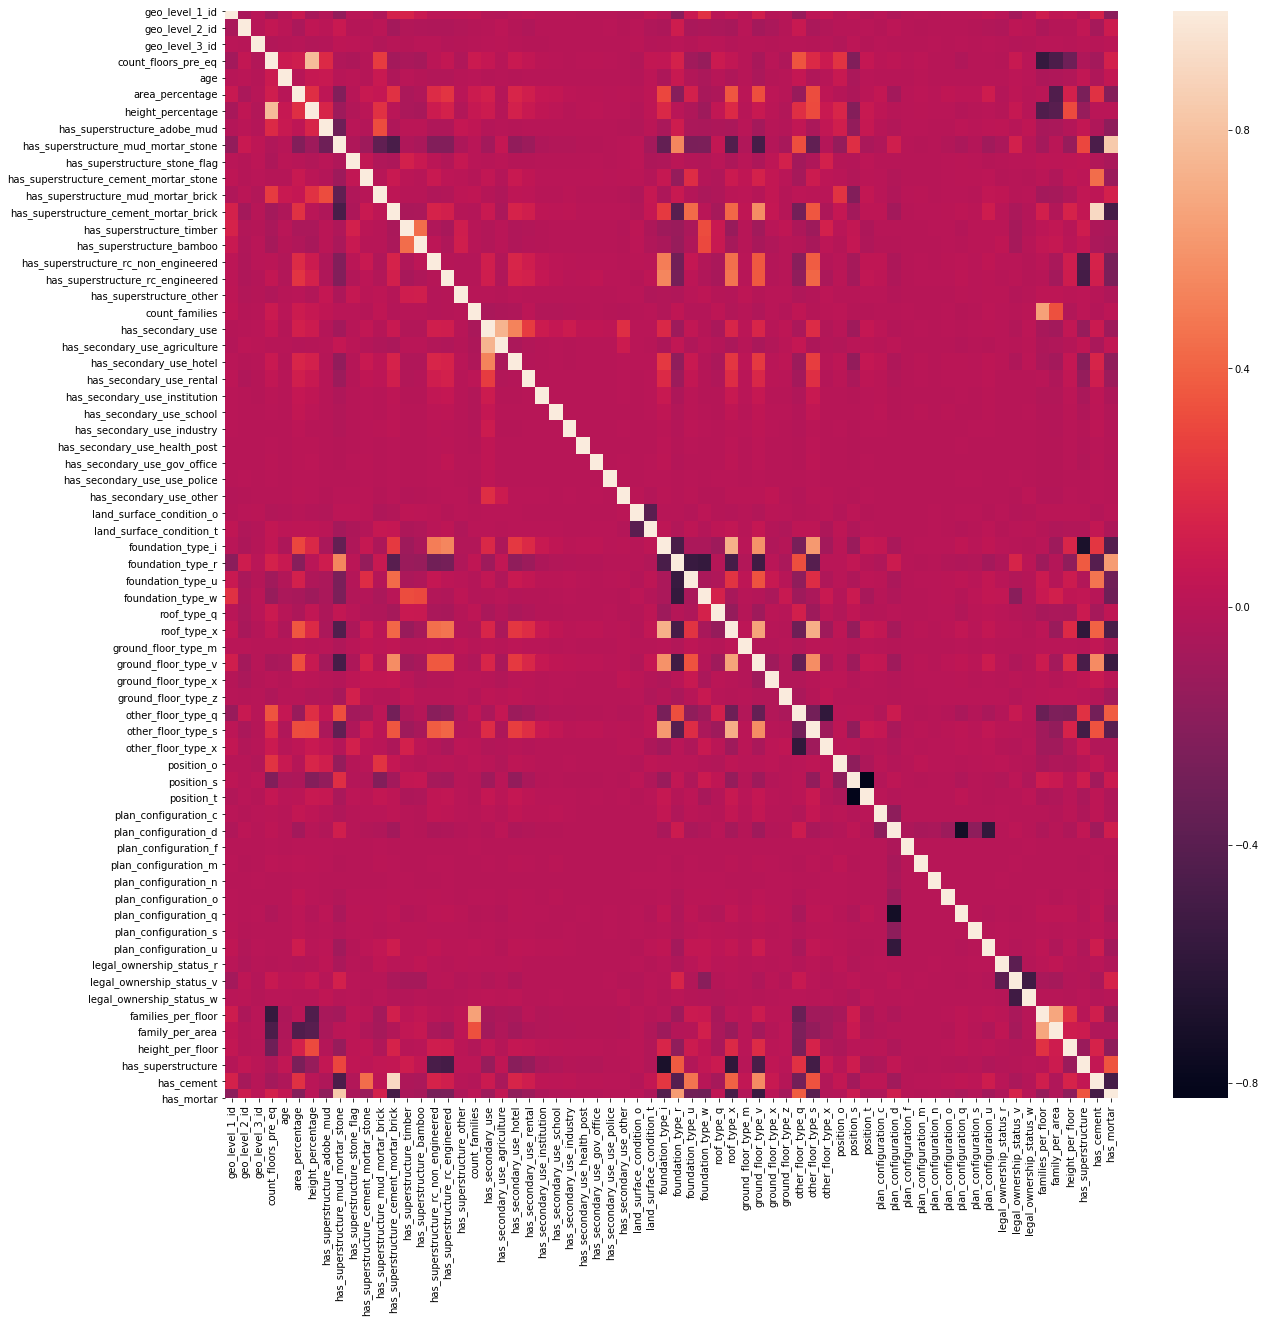

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),)

In [14]:
x = data.iloc[:len(x), :]
X = data.iloc[len(x):, :]


In [15]:
x.shape

(260601, 66)

In [16]:
X.shape

(86868, 66)

In [17]:
y.shape

(260601,)

In [ ]:
x.to_csv("train_fe_DL.csv", index=False)
X.to_csv("test_fe_DL.csv", index=False)

In [18]:
full = pd.concat([x, y], axis=1)

In [19]:
print(abs(full.corrwith(full['damage_grade'])).sort_values())

plan_configuration_f                   0.000517
plan_configuration_n                   0.001587
has_secondary_use_use_police           0.001656
legal_ownership_status_r               0.002591
position_o                             0.004787
                                         ...   
has_superstructure_mud_mortar_stone    0.291325
ground_floor_type_v                    0.318720
has_mortar                             0.329624
foundation_type_r                      0.343355
damage_grade                           1.000000
Length: 67, dtype: float64


In [20]:
data.corrwith(data['area_percentage'])

geo_level_1_id         0.071798
geo_level_2_id        -0.048896
geo_level_3_id        -0.004947
count_floors_pre_eq    0.102440
age                   -0.003912
                         ...   
family_per_area       -0.441054
height_per_floor       0.126733
has_superstructure    -0.256478
has_cement             0.213159
has_mortar            -0.218854
Length: 66, dtype: float64

In [ ]:
data['family_per_area'].values

In [ ]:
np.inf

In [ ]:
data[data['area_per_family']==np.inf][['count_families', 'area_percentage', 'area_per_family']]

In [21]:
for i in data[data['family_per_area']==np.inf]['area_per_family']:
    i = 0
data[data['family_per_area']==np.inf]

KeyError: 'area_per_family'

In [22]:
data[data['area_per_family']==np.inf]

KeyError: 'area_per_family'

In [ ]:

train = pd.read_csv('train_values.csv')

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(train)

In [ ]:
x

In [ ]:
x.shape, y.shape

In [ ]:
x.columns

In [ ]:
x = pd.concat([x, y], axis=1)

In [23]:
z=x.groupby(by='geo_level_1_id', as_index='count_families').mean()
plt.plot(z.index, z.damage_grade)

AttributeError: 'DataFrame' object has no attribute 'damage_grade'

In [ ]:
z

In [ ]:
data = pd.concat([train, train_labels], axis=1, )

In [ ]:
data.head()

In [24]:

abs(data.corrwith(data['damage_grade'])).sort_values(ascending=False)

KeyError: 'damage_grade'

In [ ]:
l = []

for item in data.columns:
    if item[:3] == "has":
        l.append(item)

In [ ]:
l

In [ ]:
ssdata = data[l]

In [ ]:
ssdata

In [ ]:
plt.figure(figsize=(20,15))

sns.heatmap(ssdata.corr(), )

In [ ]:
ssdata.dtypes

In [ ]:
data.select_dtypes('object')

In [25]:
for item in data.select_dtypes('object').columns:
    print(item)
    print(data[item].value_counts(), '\n')

In [ ]:
sum(data[data['plan_configuration']=='q']['damage_grade'].values)/len(data[data['plan_configuration']=='q']['damage_grade'].values)

In [ ]:
for col in data.select_dtypes('object').columns:
    print(col,'\n')
    for i in data[col].value_counts().index:
        avg_damage = sum(data[data[col] == i]['damage_grade'].values)/len(data[data[col] == i]['damage_grade'].values)
        print(i, avg_damage, sep='\t')

In [ ]:
data.shape

In [ ]:
data.select_dtypes('object')

In [26]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
ohe = OneHotEncoder()
x = ohe.fit_transform(data)
x.head()

In [ ]:
data.count_families.value_counts()

In [ ]:
data.area_percentage.value_counts()

In [ ]:
data.height_percentage.value_counts()

In [27]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train_fe_3.csv')
test = pd.read_csv('test_fe_3.csv')
y_label = pd.read_csv('train_labels.csv')


df = pd.concat([train, test], axis=0)



In [ ]:
df.head()

In [ ]:
df.shape

In [28]:
df.isna().sum().sum()

0

In [29]:
data = pd.concat([train, y_label], axis=1)

In [30]:
for item in test['geo_level_1_id']:
    if item not in train['geo_level_1_id']:
        print(item)

In [31]:
for item in test['geo_level_2_id']:
    if item not in train['geo_level_2_id']:
        print(item)

In [32]:
for item in test['geo_level_3_id']:
    if item not in train['geo_level_3_id']:
        print(item)

In [33]:
data.shape

(260601, 47)

In [34]:
z = data.groupby(by='geo_level_1_id').mean()

geo_1_risk = {}
for i in range(0, z.shape[0]):
    geo_1_risk[i] = z.iloc[i,-1]


z = data.groupby(by='geo_level_2_id').mean()


geo_2_risk = {}
for i in range(0, z.shape[0]):
    geo_2_risk[i] = z.iloc[i,-1]


z = data.groupby(by='geo_level_3_id').mean()

geo_3_risk = {}
for i in range(0, z.shape[0]):
    geo_3_risk[i] = z.iloc[i,-1]


df['geo_1_risk'] = df['geo_level_1_id'].map(geo_1_risk)
df['geo_2_risk'] = df['geo_level_2_id'].map(geo_2_risk)
df['geo_3_risk'] = df['geo_level_3_id'].map(geo_3_risk)


In [35]:
for k in train['geo_level_3_id']:
    if k not in geo_3_risk.keys():
        print(k)

12198
12066
12236
12188
12267
12323
12323
12040
11722
12532
12265
12341
12081
11771
12561
11672
11793
12168
12059
11652
12162
12014
11870
11975
12346
12017
12328
11752
11598
12275
11889
12430
11657
12319
11944
12193
12186
11761
11900
12356
12492
12258
11775
12488
11846
11944
11945
11979
11743
11642
12194
12191
11670
11782
12281
11805
11850
11935
11726
12092
12361
12239
12132
12327
11732
11738
12390
12198
11776
11687
12311
12443
11887
12077
11805
11842
11814
12299
12476
11871
12328
12114
12286
11757
11763
12181
11887
12190
11644
11662
12455
11853
12081
11973
12285
11846
12240
12508
12198
12248
12251
11714
12350
12466
11805
12329
11846
12258
12348
11894
11734
11813
12002
12387
12258
11788
12186
12174
12246
12456
11690
12526
12336
11798
11750
12089
12491
12258
11928
11866
11652
11680
12383
12229
11736
12073
11995
12340
11945
11610
12110
12422
12114
12370
11699
11613
12433
11999
11797
12397
12268
11796
12217
11880
12376
12264
11782
12491
11677
12376
12258
12239
12328
11911
11782
12183
1218

12457
11883
12387
12152
11927
12555
12144
11857
11998
12527
12256
12002
12421
12110
12382
11921
12458
11986
12457
11882
12093
12093
11866
12239
12517
12035
11857
11904
12196
12258
11596
12377
12019
11611
12161
12482
11882
11952
12521
11687
12344
12030
12061
11870
12181
12341
12327
11805
12155
11683
12527
12113
11682
12285
11667
12430
11710
11707
11745
12308
12380
12329
12108
11952
12559
11996
12299
11902
11832
11658
12323
12379
12285
12104
12227
12427
12517
12398
11805
11819
12462
11797
11775
12038
12487
12228
12142
11990
12121
11793
12139
12275
11849
12371
12319
11988
12258
12348
12295
11846
11891
12061
11793
12537
12157
12168
12061
12350
12181
12157
11843
11866
12350
12267
11801
11725
12096
11945
12523
11611
12258
12065
12501
11940
11640
12503
12177
12232
12439
11822
11624
12298
11730
12093
11846
12103
12319
12486
11933
12487
12323
12443
11749
12421
12217
12129
11847
12181
11710
12491
12258
11775
12288
12035
11884
11797
12439
11595
11998
12307
12445
11611
12318
12100
12225
11946
1187

11776
12020
12114
12132
11945
11760
11683
12550
12258
11746
12394
11785
12318
12110
12385
11687
11904
11692
12235
12125
11605
11973
12020
11608
12163
11849
11755
11908
12319
11801
12181
11904
11921
12113
11775
11891
12398
12385
12061
12443
12131
12174
12168
12459
12077
12388
12209
12157
12103
11685
11643
12292
11887
11733
12259
11891
12401
11935
12527
11613
12534
12339
12281
11694
12266
12414
11654
11595
11911
12251
11700
12142
12416
12424
11941
12284
11834
11847
12091
12540
12065
12458
12449
11621
11617
12059
12119
12344
11613
11727
11892
12110
11798
11882
11941
12319
11699
12061
12104
12054
11775
11974
12281
11856
12331
12063
11990
12315
12119
11735
11855
11652
11631
12182
11760
12448
12157
12273
11725
12131
12545
12112
12020
11671
11595
12430
12139
12054
12303
12431
12157
12368
12445
12501
11842
12275
11651
11834
12324
11842
11994
12116
12523
12326
11822
11954
11621
12507
11679
12318
12481
12356
11994
12161
11750
12181
11723
12359
11805
12130
11870
11808
11761
12030
12209
11994
1198

11917
12507
11947
11846
11882
11824
12479
12290
12336
12185
12268
11904
11659
12312
11733
11990
12320
11761
12501
11657
12111
11694
11962
11887
11685
11799
11846
11609
12181
11614
12426
11911
12327
11856
11822
11891
12157
11805
12319
12329
12258
11911
11954
11637
11714
11793
12458
12258
12157
11601
12420
11604
12521
11850
12268
12130
12480
12553
12236
12397
12125
11978
12491
12447
11644
12249
12129
12505
11994
11651
12120
11700
11734
11639
12311
12093
12101
11749
11617
12508
12104
11671
12307
11743
11998
11672
12213
11728
11857
12507
12097
12377
11721
12164
12258
11683
11839
12259
12318
12487
12043
12227
11665
12484
11993
11652
12224
12459
12430
12334
11990
12561
12327
12492
11880
12491
12078
12092
11998
12421
11880
11945
12319
12132
12380
12525
11911
11614
12266
12360
11994
11799
12448
12361
11853
12479
11945
12101
11748
12481
12113
11894
12329
11813
12185
11874
11757
12368
11750
11775
11652
11855
12556
12563
12127
12299
11733
12422
12494
11774
12451
11683
12147
11746
11707
12004
1224

11776
12460
12157
12347
11772
11995
11671
12555
12331
11860
12277
12459
11711
12390
12185
12321
11882
12247
11857
11835
11945
12159
12406
11700
12125
12526
12063
11721
12114
11986
12498
12277
11811
12210
12174
12077
12121
11750
12277
11945
12489
11930
12458
11814
12258
11669
12495
11882
11846
12067
11711
12113
12218
12103
12035
12276
12258
12188
12215
12521
12077
11605
12421
12461
12029
12130
12376
11750
12323
11866
11793
11613
12384
11749
12171
11973
11801
12267
12222
12161
11624
12234
12186
12330
12256
11936
11976
11796
12101
12014
12092
12551
12217
11836
11780
11637
12310
12147
11786
11882
11882
11890
12527
11848
11945
11639
12258
11814
12262
12414
12263
11725
12344
11904
12258
11745
12180
12264
11738
11785
11950
12319
11830
11613
11952
11883
11744
12524
12045
12329
12294
12507
11667
12285
12159
11788
12477
12461
11986
12101
11918
12222
12361
12376
12263
11813
11759
12344
12301
12188
12250
11653
11998
12481
12481
11755
11698
11994
11622
12472
12061
12462
11793
12163
12143
12130
1194

11710
12258
12430
12339
11798
11978
12081
12035
12305
12157
11846
12120
11758
12329
11943
12163
12301
12405
11781
11912
11668
11788
12091
11945
12100
11736
12185
11846
12157
12565
12247
12327
12327
11733
12276
12443
12268
11904
12474
12258
12443
12258
12511
11752
11621
11978
12426
12359
12563
12461
12261
11923
11671
11775
11808
11873
12066
12155
12014
12181
12299
12507
12433
11819
12079
11995
12163
12125
11672
12263
11795
12348
11884
11708
11994
11998
12061
12258
11799
11965
12124
12327
11854
12350
12542
12240
12295
11773
12525
11797
12387
11743
12119
11965
11849
12463
11995
11945
12344
12375
11868
11963
12119
12433
12192
12285
12486
12235
11793
11857
12484
12521
12414
12421
11637
12376
11941
11850
12258
12527
12378
11882
12495
12458
12043
11762
12396
12036
12002
12065
11947
12395
12101
12455
11805
12511
12443
11775
12464
12100
11866
11785
12280
12326
11844
11799
11743
12127
12474
11856
12120
12523
12277
11823
11596
12479
11788
12134
11651
11726
12139
12308
11655
12160
11974
12262
1255

11931
11608
11940
11779
12553
11936
11718
11725
12563
11856
11608
11882
12323
12057
12079
12525
12542
12046
12258
12412
12323
11665
12336
12540
12428
11643
12263
12258
12178
12132
11911
12095
11727
11935
12185
11751
11945
12101
12097
12375
12093
11701
12395
11694
11988
12486
11853
12323
12121
12004
12258
12511
12328
11605
12093
12538
12198
12160
11940
11832
11688
12083
11826
11621
11799
12353
11632
11991
12489
11762
11788
12104
12198
11741
11989
12433
12299
12139
12033
12542
11911
11613
12555
12310
12455
12096
12480
11911
12231
12323
12339
11794
12263
11945
12350
12401
11757
11936
12200
11711
12292
12059
12184
12398
11895
11776
11906
11670
11605
12258
12248
12266
11967
12132
11698
11871
12125
12157
11743
11919
11749
12172
11993
12353
12263
11699
12507
12476
12258
12080
12125
11686
11617
12312
11846
12330
11598
12155
11973
12036
11717
12481
12320
12479
12327
12258
12011
11695
11917
12144
12350
12077
12020
11824
11771
11952
12513
11694
12319
12099
11887
11721
12231
11846
12152
11755
1179

11718
12089
11850
11846
12443
12307
11711
12258
11624
11846
12181
11597
12434
12443
11805
11799
12307
11682
12035
12249
11722
11974
11775
12366
11708
11974
11634
12217
11766
11856
12216
11956
12232
12263
11931
12421
12252
12209
11775
12439
11659
11883
11735
12461
12081
11862
12033
12507
12284
11724
11794
12327
11797
12344
12327
12203
12360
12008
11846
12116
12294
11683
12129
12224
12413
12271
12231
12002
12482
11791
11800
12194
11846
11771
12231
12460
11698
11882
11725
11787
11927
12222
11608
12378
11753
12397
12035
11621
12479
12472
12277
12267
11946
11635
12492
12397
12292
12009
12443
12043
12147
12157
11832
11798
12239
12219
12368
12324
12360
12364
12439
11652
12387
12336
11730
12459
12208
12258
12193
12393
12292
12330
11882
12208
11621
11717
12360
12186
12196
12368
12380
11974
11873
12157
11694
12002
11602
12340
11624
12002
12390
11656
11930
11808
11938
11601
12299
11814
11651
12323
12414
12129
11889
11799
12110
11857
12341
11846
12106
11667
11793
12026
12435
12100
12440
11928
1235

11727
12112
11846
12258
12176
12378
11836
11875
11963
11998
12299
12035
11717
12136
11940
12366
12413
11847
12284
12258
12016
11608
12020
11785
12459
11853
12185
11595
12104
12307
11975
12370
12127
12030
11842
12232
11779
11787
12067
11790
12219
11832
11617
11728
11792
11759
12560
12561
12323
11799
12373
11665
12155
11785
11795
11999
11805
12456
12406
11734
12073
12448
12261
12033
12544
11891
12430
11655
11644
11759
12038
12329
12344
12099
12435
11777
12448
11976
11792
12237
12491
11745
12500
12193
12097
11857
11785
11892
11762
12455
12013
12064
11946
11940
11918
12130
11817
11928
11674
12281
12061
12565
11610
12036
11943
12247
12455
12174
12263
12479
12092
12457
12444
12020
12256
12265
11837
12443
11846
12119
12340
12180
12101
11625
12249
11880
12222
12344
12329
12319
11860
11711
12432
11917
12250
11680
12444
11797
11857
11882
11730
12342
11916
11735
12492
11673
12043
11966
12558
12209
11609
12340
11965
12259
12185
12061
11614
12196
11882
12372
12096
12157
11865
12344
12449
12376
1211

11940
11847
12479
12416
11994
11782
11715
11973
12306
12147
11755
11656
11943
11745
11889
12457
12093
11779
11882
11758
12077
12350
12476
12535
12218
11938
12339
11765
11967
12125
11727
12029
11814
12503
12227
11941
12035
11986
11986
11822
11791
12522
12377
11957
12312
11795
11957
12119
11983
12242
11643
11814
12102
11706
11787
12421
11805
11785
12103
12540
12138
11728
12198
12259
12208
11653
11613
11918
12181
12312
12073
11605
12207
11755
12458
12535
11727
11682
11617
12101
12168
11717
11949
11669
12494
12459
12344
12266
12160
12093
11606
12026
12157
12253
11908
11708
11792
12550
12125
12439
12491
11703
11788
12102
11813
12157
11842
12456
12359
12258
12435
12016
12318
12395
12299
11651
12167
12399
12459
12185
11703
12443
12339
11986
12481
12360
11791
11847
12327
11952
11751
11822
12002
12235
12560
12130
12258
12482
12561
11668
11830
12258
12030
11805
11681
11945
11685
11945
12524
11883
12344
11757
11653
12023
12239
11671
11850
11773
12227
11847
11680
12093
11743
12144
11737
11762
1216

In [36]:
ctr=0
for item in df['geo_level_2_id']:
    if item not in geo_2_risk.keys():
        #print(item)
        ctr+=1
print(ctr, test.shape)

3491 (86868, 45)


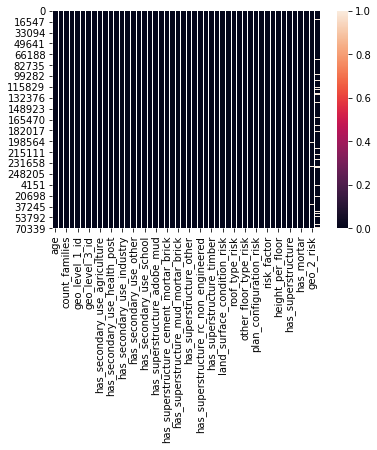

In [37]:
sns.heatmap(pd.isnull(df))

In [38]:
df['geo_2_risk'].fillna(method='backfill', axis=0, inplace=True)
df['geo_3_risk'].fillna(method='backfill', axis=0, inplace=True)


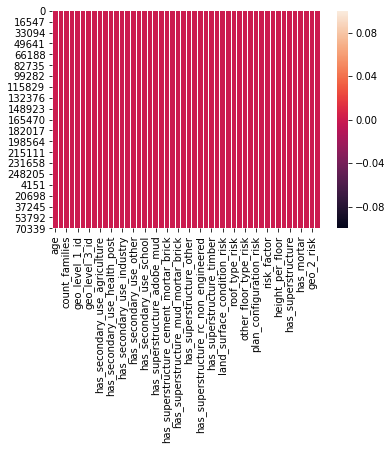

In [16]:
sns.heatmap(pd.isnull(df))

In [39]:
data['geo_1_risk']

KeyError: 'geo_1_risk'

In [40]:
x = df.iloc[:len(train), :]
X = df.iloc[len(train):, :]

# MACHINE LEARNING ALGORITHMS

In [41]:
from sklearn.linear_model import LinearRegression, LassoCV, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRFClassifier

In [ ]:
'''!pip3 install xgboost

!pip3 install --upgrade pip



import sys
!{sys.executable} -m pip install xgboost
'''

In [ ]:
import sys
!{sys.executable} -m pip install keras

In [ ]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
pred_logr = logr.predict(x_test)

print('Simple Logistic Regression\n\n',confusion_matrix(y_test, pred_logr), '\n\n\n', classification_report(y_test, pred_logr))



In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print(confusion_matrix(y_test, pred_dtc), '\n\n\n', classification_report(y_test, pred_dtc), '\n\n\n', f1_score(y_test, pred_dtc, average='micro'))


In [ ]:
etc = ExtraTreeClassifier(criterion='entropy')
etc.fit(x_train, y_train)
pred_etc = etc.predict(x_test)
print(confusion_matrix(y_test, pred_etc), '\n\n\n', classification_report(y_test, pred_etc), '\n\n\n', f1_score(y_test, pred_etc, average='micro'))


In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(confusion_matrix(y_test, pred_svc), '\n\n\n', classification_report(y_test, pred_svc), '\n\n\n', f1_score(y_test, pred_svc, average='micro'))


In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb = nb.predict(x_test)
print(confusion_matrix(y_test, pred_nb), '\n\n\n', classification_report(y_test, pred_nb), '\n\n\n', f1_score(y_test, pred_nb, average='micro'))


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test, pred_knn), '\n\n\n', classification_report(y_test, pred_knn), '\n\n\n', f1_score(y_test, pred_knn, average='micro'))


In [ ]:
p_g_knn = {'n_neighbors':[5,10,15], 'weights':['distance'], 'leaf_size':[10,30,50,70,80,100]}
grid_knn = GridSearchCV(knn, p_g_knn, verbose=4)
grid_knn.fit(x_train, y_train)

In [ ]:
pred_knn_grid = grid_knn.predict(x_test)
print(confusion_matrix(y_test, pred_knn_grid), '\n\n\n', classification_report(y_test, pred_knn_grid), '\n\n\n', f1_score(y_test, pred_knn_grid, average='micro'))


In [ ]:
grid_knn.best_params_

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=15, leaf_size=70, weights='distance')
knn_opt.fit(x,y)
pred_knn_opt = knn_opt.predict(X)

In [ ]:
sub

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print(confusion_matrix(y_test, pred_rfc), '\n\n\n', classification_report(y_test, pred_rfc), '\n\n\n', f1_score(y_test, pred_rfc, average='micro'))


In [ ]:
p_g_rfc = {'n_estimators':[10, 1000], 'criterion':['entropy']}
grid_rfc = GridSearchCV(rfc, p_g_rfc, verbose=3)
grid_rfc.fit(x_train, y_train)


In [ ]:
grid_rfc.best_params_

In [ ]:
print(confusion_matrix(y_test, pred_rfc), '\n\n\n', classification_report(y_test, pred_rfc), '\n\n\n', f1_score(y_test, pred_rfc, average='micro'))


In [ ]:
pred_rfc_grid = grid_rfc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred_rfc_grid), '\n\n\n', classification_report(y_test, pred_rfc_grid), '\n\n\n', f1_score(y_test, pred_rfc_grid, average='micro'))


In [ ]:
sub = pd.read_csv('submission_format.csv')

sub['damage_grade'] = pred_rfc

sub.to_csv('Sub_1.csv', index=False)

In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(rfc, x_train, y_train, cv = 10)

In [ ]:
acc

In [ ]:
acc.mean()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print(confusion_matrix(y_test, pred_xgb), '\n\n\n', classification_report(y_test, pred_xgb), '\n\n\n', f1_score(y_test, pred_xgb, average='micro'))


In [ ]:
p_g_xgb = {'n_estimators':[10,100], 'learning_rate':[0.5,1], 'max_depth':[3,5,10]}
grid_xgb = GridSearchCV(xgb, p_g_xgb, verbose=3)
grid_xgb.fit(x_train, y_train)

In [ ]:
grid_xgb.best_params_

In [ ]:
0.741599

In [ ]:
0.7165

In [ ]:
xgb = XGBRFClassifier(n_estimators=100, max_depth=10, learning_rate=0.5)
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print(confusion_matrix(y_test, pred_xgb), '\n\n\n', classification_report(y_test, pred_xgb), '\n\n\n', f1_score(y_test, pred_xgb, average='micro'))


In [ ]:
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.5)
xgb.fit(x, y)
pred_xgb = xgb.predict(X)

In [ ]:
sub = pd.read_csv('submission_format.csv')

sub['damage_grade'] = pred_xgb

sub.to_csv('Sub_4.csv', index=False)

In [ ]:
pred_xgb_grid = xgb.predict(x_test)
print(confusion_matrix(y_test, pred_xgb_grid), '\n\n\n', classification_report(y_test, pred_xgb_grid), '\n\n\n', f1_score(y_test, pred_xgb_grid, average='micro'))


## IMPROVED CODING

In [42]:
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

lr = LogisticRegression()
sgdc = SGDClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
etc = ExtraTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()
xgbr = XGBRFClassifier()
lgb = LGBMClassifier()

models = [ lr, ada, bag, etc, gbc, rfc, 
           knn, xgb, xgbr, lgb]


x_train,x_test,y_train,y_test = train_test_split(x,y_label['damage_grade'],test_size=0.13,shuffle=True)

d = [x_train, y_train, x_test, y_test]

In [43]:
def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    score = f1_score(data[3], pred, average='micro')
    return score

In [44]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, d)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1])
    

LogisticRegression 0.6612060568493757
AdaBoostClassifier 0.6638920865432864
BaggingClassifier 0.7138050119543081
ExtraTreeClassifier 0.6408099412615484
GradientBoostingClassifier 0.6859116266713894
RandomForestClassifier 0.7052746539154048
KNeighborsClassifier 0.7071637297440893
[16:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7331680391983234
[16:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier 0.6770270669146079
LGBMClassifier 0.7179963989492

In [51]:
run_model(XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.12),d)

[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.744650078219546

l_r = 0.05 -> 0.7451

In [39]:
run_model(LGBMClassifier(n_estimators=1000, num_leaves=100, max_depth=15, learning_rate=0.1),d)

0.7328138374804453

In [46]:
params = {'n_estimators':[900,1100, 950, 1050], 'learning_rate':[0.001,0.01,0.05,0.1]}
grid_xgb = GridSearchCV(xgb, params, verbose=3)
grid_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] learning_rate=0.001, n_estimators=900 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, n_estimators=900, score=0.678, total= 5.0min
[CV] learning_rate=0.001, n_estimators=900 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min remaining:    0.0s


[17:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, n_estimators=900, score=0.681, total= 5.0min
[CV] learning_rate=0.001, n_estimators=900 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.0min remaining:    0.0s


[17:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, n_estimators=900, score=0.679, total= 5.0min
[CV] learning_rate=0.001, n_estimators=1100 ..........................
[17:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, n_estimators=1100, score=0.679, total= 6.1min
[CV] learning_rate=0.001, n_estimators=1100 ..........................
[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learne

[CV]  learning_rate=0.01, n_estimators=950, score=0.709, total= 5.2min
[CV] learning_rate=0.01, n_estimators=1050 ...........................
[19:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, n_estimators=1050, score=0.710, total= 6.7min
[CV] learning_rate=0.01, n_estimators=1050 ...........................
[19:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, n_estimators=1050, score=0.715, total= 7.3min
[CV] learning_rate=0.

[21:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, n_estimators=1100, score=0.742, total= 7.1min
[CV] learning_rate=0.1, n_estimators=1100 ............................
[21:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, n_estimators=1100, score=0.744, total= 6.8min
[CV] learning_rate=0.1, n_estimators=1100 ............................
[21:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.c

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 299.3min finished


[22:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n...
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact',
       

In [47]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 1100}

In [48]:
grid_xgb.best_score_

0.7427686770582476

0.74955

In [42]:
sub =pd.read_csv("submission_format.csv")
mod = LGBMClassifier(n_estimators=1000, num_leaves=100, max_depth=15, learning_rate=0.1)
mod.fit(x, y_label['damage_grade'])
pred = mod.predict(X)
sub['damage_grade'] = pred

In [37]:
x.to_csv('train_fe_4.csv', index=False)
X.to_csv('test_fe_4.csv', index=False)

In [43]:
sub.to_csv('Sub_12.csv', index=False)

In [ ]:
for k,v in geo_3_risk.items():
    print(k, v)

In [ ]:
geo_3_risk

In [ ]:
x.isna().sum()

In [ ]:
y_label.head()

In [5]:
def find_index(arr, x, n=0):
    if n==len(arr):
        return "Number not in list"
    if arr[n]==x:
        return "Number is at index {}".format(n)
    return find_index(arr, x, n+1)

In [6]:
find_index([1,2,3,4,5], 42)

'Number not in list'